# MP2 Solving the CartPole with A2C

## About this notebook

In this notebook you find the code to run all requirred agents. In the end of the notebook, you also find the code to produce the plots we included in the report. Note that we did not implement parallell workers, instead they work serially.

## How to make it work
To create the plots for project report you must have created a folder "lists" wit a folder for each Agent: "Agent 1" and so on. This is because after each run we save the results in a json file. If you dont need this you can just comment away json saving. 

Currently we are also saving the plots in the end into folders "imgs/Agent1Only", "imgs/AllDiscReturns", "imgs/Cont", "imgs/DiscRest". Otherwise the saving will not work. You can also  comment this out. The plots that we used in the report are visible already.

## Requirements
- `Torch`
- `NumPy`
- `Matplotlib`
- `json`
- `gymnasium`
- `gymnasium.wrappers`: To be able to record the environment

## Import requirred libraries

In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from train import train
import json

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## This can be run on both GPU and CPU

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


## The Discrete Environment

### Agent 1

In [ ]:
# Ali
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=1
n=1
env_name='CartPole-v1'
continous=False
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=1


dict_lists = train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval,
              num_eval_episodes, max_steps, prob_mask, record_video="K=1-n=1-disc", seeds=[420, 69, 1337])

with open('./lists/Agent 1/values.json', 'w') as f:
   json.dump(dict_lists, f)

### Agent 1 + Stochastic rewards


In [ ]:
# Ali
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=1
n=1
env_name='CartPole-v1'
continous=False
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1

dict_lists = train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval,
             num_eval_episodes, max_steps, prob_mask, record_video="K=1-n=1-disc-mask" ,seeds=[420, 69, 1337])

with open('./lists/Agent 1 Stochastic/values.json', 'w') as f:
    json.dump(dict_lists, f)

### Agent 2

In [ ]:
# Ali
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=6
n=1
env_name='CartPole-v1'
continous=False
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1

dict_lists = train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval,
              num_eval_episodes, max_steps, prob_mask, record_video="K=6-n=1-disc-prob", seeds=[420, 69, 1337])

with open('./lists/Agent 2/values.json', 'w') as f:
    json.dump(dict_lists, f)

### Agent 3

In [ ]:
# ALi
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=1
n=6
env_name='CartPole-v1'
continous=False
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1

dict_lists = train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval, num_eval_episodes,
      max_steps, prob_mask, record_video="K=6-n=6-disc-prob", seeds = [420, 69, 1337]) 

with open('./lists/Agent 3/values.json', 'w') as f:
    json.dump(dict_lists, f)

### Agent 4

In [ ]:
# Elias
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=6
n=6
env_name='CartPole-v1'
continous=False
log_interval=1000
eval_interval=2000
num_eval_episodes=10
max_steps=20000
prob_mask=0.1

dict_lists = train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval, num_eval_episodes,
      max_steps, prob_mask, record_video="K=6-n=6-disc-prob", seeds = [420, 69, 1337]) 

# with open('./lists/Agent 4/values.json', 'w') as f:
#     json.dump(dict_lists, f)

## The Continous Environment

### Agent 5

In [ ]:
# Elias
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=1
n=1
env_name='InvertedPendulum-v4'
continous=True
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1
dict_lists =train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval, num_eval_episodes,
                  max_steps, prob_mask, record_video="K=1-n=1-cont-prob", seeds=[420, 69, 1337])

with open('./lists/Agent 5/values.json', 'w') as f:
    json.dump(dict_lists, f)

### Agent 6

In [ ]:
# ELias
lr_actor=3e-4
lr_critic=1e-3
gamma=0.99
K=6
n=6
env_name='InvertedPendulum-v4'
continous=True
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1
dict_lists=train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval, num_eval_episodes,
                 max_steps, prob_mask, record_video="K=6-n=6-cont-prob-lr", seeds=[420, 69, 1337])

with open('./lists/Agent 6/values.json', 'w') as f:
    json.dump(dict_lists, f)

## Plots Used in The Report

### Load the saved dictionaries

In [28]:
disc_agents_dicts = {f: json.load(open("./lists/" + f + "/values.json")) for f in ["Agent 1", "Agent 1 Stochastic", "Agent 2", "Agent 3", "Agent 4"]}
cont_agents_dicts = {f: json.load(open("./lists/" + f + "/values.json")) for f in ["Agent 5", "Agent 6"]}

### AGENT 1 

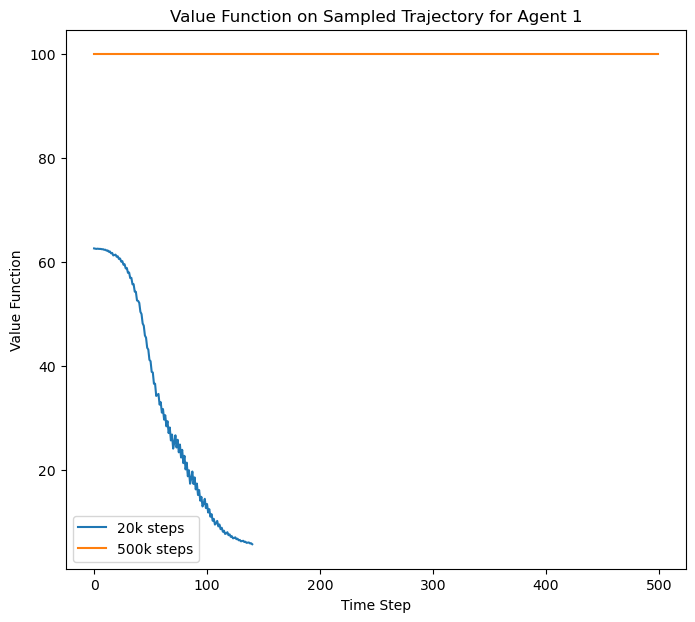

In [29]:
val_traject = disc_agents_dicts["Agent 1"]["value_funcs_20_100_500"]
val_traject= [val_traject[0], val_traject[3]]
plt.figure(figsize=(8,7))
for traject in val_traject:
    plt.xlabel('Time Step')
    plt.ylabel('Value Function')
    plt.title('Value Function on Sampled Trajectory for Agent 1')
    plt.plot(traject)

plt.legend(["20k steps", "500k steps", "500k steps"], prop={'size': 10})
plt.savefig('imgs/Agent1Only/Value_traject.png', dpi = 300,  bbox_inches='tight')

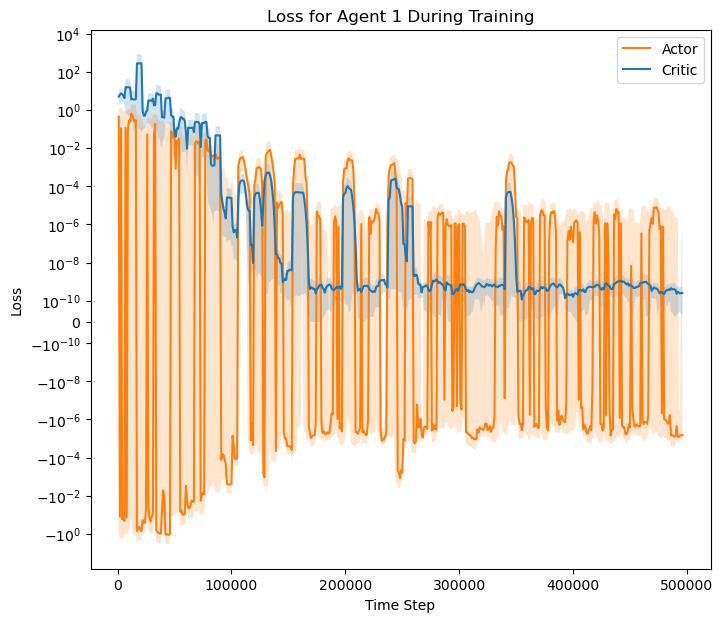

In [30]:
agent1_critic_loss = disc_agents_dicts["Agent 1"]["train_loss_critic_history_all"]
agent1_actor_loss = disc_agents_dicts["Agent 1"]["train_loss_actor_history_all"]

range_step = 1000
plt.figure(figsize=(8,7))
plt.xlabel('Time Step')
plt.ylabel('Loss')
plt.title('Loss for Agent 1 During Training')
plt.yscale('log')  # Set y-axis to log scale


mean = np.convolve(np.mean(agent1_actor_loss, axis=0), np.ones(5)/5, mode='valid')
min = np.convolve(np.min(agent1_actor_loss, axis=0), np.ones(5)/5, mode='valid')
max = np.convolve(np.max(agent1_actor_loss, axis=0), np.ones(5)/5, mode='valid')
plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= "Actor", color = '#FF7F0E')
plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.2, facecolor = '#FF7F0E')

mean = np.convolve(np.mean(agent1_critic_loss, axis=0), np.ones(5)/5, mode='valid')
min = np.convolve(np.min(agent1_critic_loss, axis=0), np.ones(5)/5, mode='valid')
max = np.convolve(np.max(agent1_critic_loss, axis=0), np.ones(5)/5, mode='valid')
plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= "Critic",color = '#1F77B4' )
plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.2, facecolor='#1F77B4')
plt.yscale('symlog', linthresh=1e-10)
plt.legend(prop={'size': 10})
plt.savefig('imgs/Agent1Only/loss.png', dpi = 300,  bbox_inches='tight')

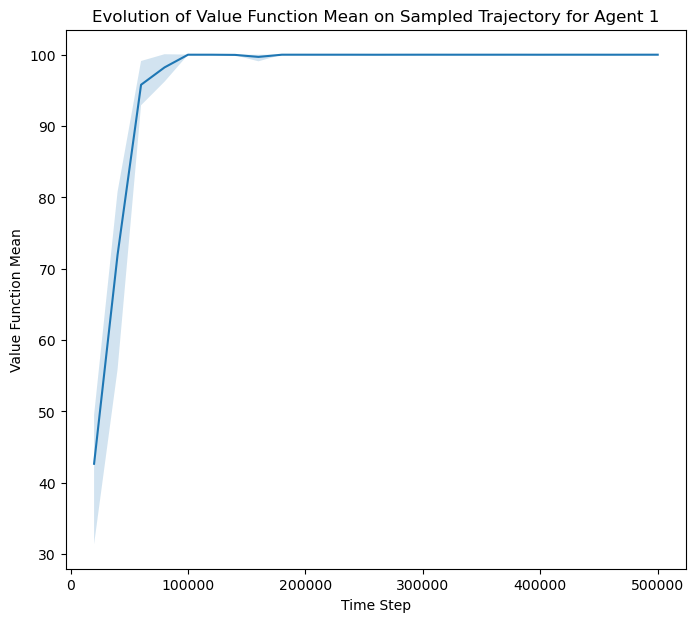

In [31]:
mean = np.mean(np.array(disc_agents_dicts['Agent 1']['value_trajectories_mean_all']), axis=0)
min = np.min(np.array(disc_agents_dicts['Agent 1']['value_trajectories_mean_all']), axis=0)
max = np.max(np.array(disc_agents_dicts['Agent 1']['value_trajectories_mean_all']), axis=0)
range_step = 20000
plt.figure(figsize=(8,7))
plt.xlabel('Time Step')
plt.ylabel('Value Function Mean')
plt.title('Evolution of Value Function Mean on Sampled Trajectory for Agent 1')
plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= 'Agent 1')
plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.2)
#plt.legend(prop={'size': 10})
plt.savefig('imgs/Agent1Only/valueEvolution.png', dpi = 300,  bbox_inches='tight')

### Rest of dicrete env Agents

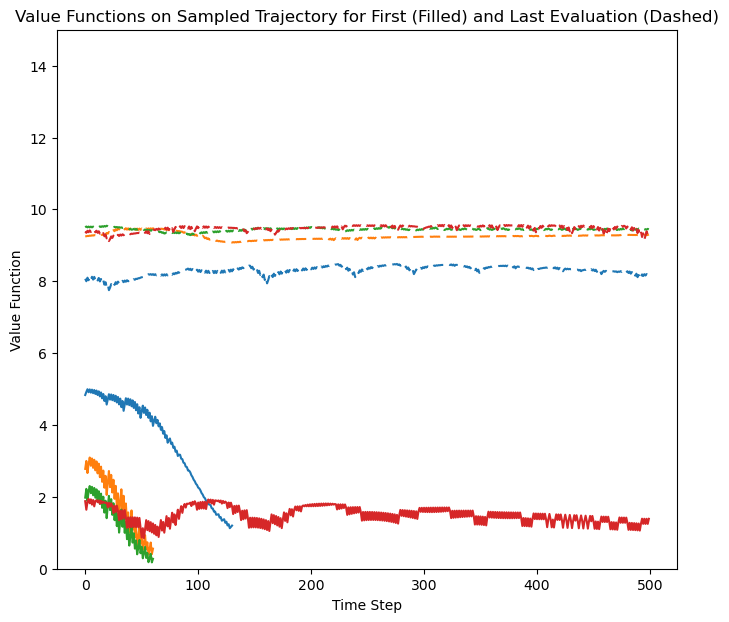

In [32]:
plt.figure(figsize=(8,7))

color_map = {}

for k,v in disc_agents_dicts.items():
    if k != "Agent 1":
        trajectory = v["value_funcs_20_100_500"][0]
        line, = plt.plot(trajectory, label = k)
        color_map[k] = line.get_color()  # Store the color of the line
        plt.xlabel('Time Step')
        plt.ylabel('Value Function')
        plt.ylim(0, 15)
        plt.title('Value Functions on Sampled Trajectory After 20K Steps')

for k,v in disc_agents_dicts.items():
    if k != "Agent 1":
        trajectory = v["value_funcs_20_100_500"][3]
        plt.plot(trajectory, label = k, color=color_map[k], dashes=[5, 3])  # Use the same color and set linestyle to dashed
        plt.ylim(0, 15)
        plt.xlabel('Time Step')
        plt.ylabel('Value Function')
        plt.title('Value Functions on Sampled Trajectory for First (Filled) and Last Evaluation (Dashed)')
plt.savefig('imgs/DiscRest/AllK.png', dpi = 300,  bbox_inches='tight')



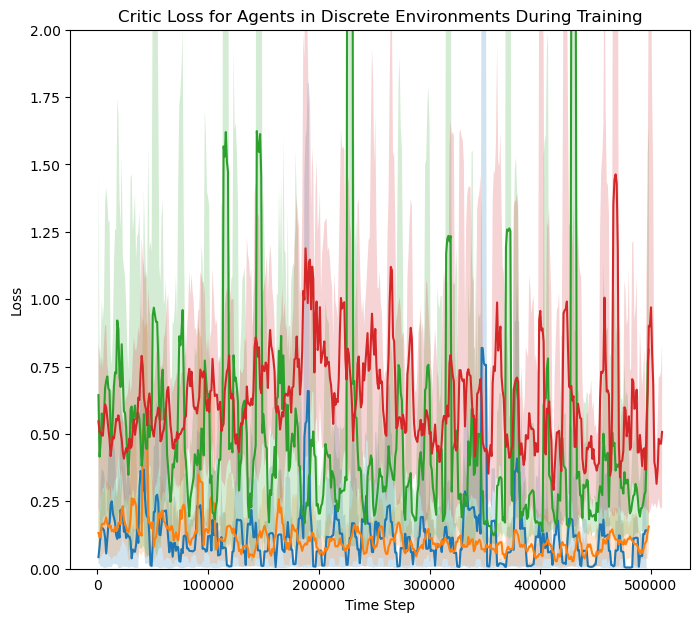

In [33]:
plt.figure(figsize=(8,7))

for k,v in disc_agents_dicts.items():
    if k != "Agent 1":
        agent_critic_loss = v["train_loss_critic_history_all"]
        mean = np.convolve(np.mean(agent_critic_loss, axis=0), np.ones(5)/5, mode='valid')
        min = np.convolve(np.min(agent_critic_loss, axis=0), np.ones(5)/5, mode='valid')
        max = np.convolve(np.max(agent_critic_loss, axis=0), np.ones(5)/5, mode='valid')
        range_step = 1000
        plt.xlabel('Time Step')
        plt.ylabel('Loss')
        plt.title('Critic Loss for Agents in Discrete Environments During Training')
        plt.ylim(0,2)
        plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k +" critic loss mean")
        plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.2, label='Min/Max')

plt.savefig('imgs/DiscRest/Criticloss.png', dpi = 300,  bbox_inches='tight')


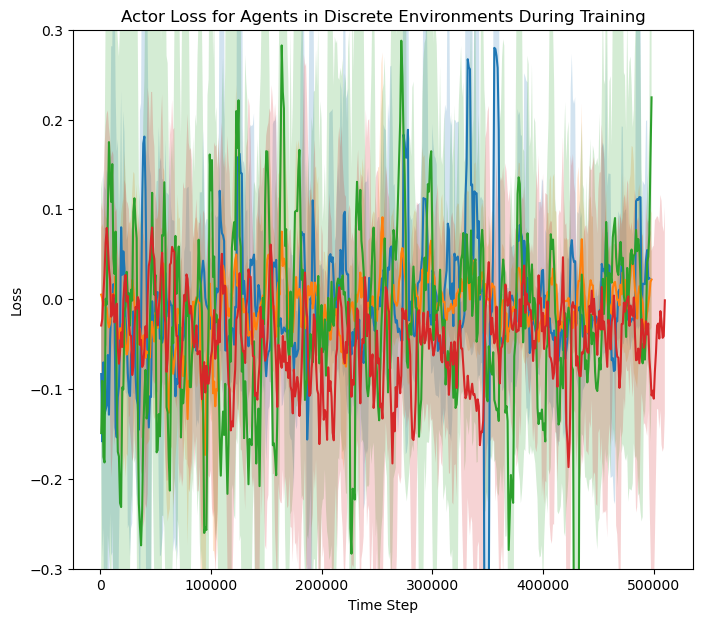

In [34]:
plt.figure(figsize=(8,7))

for k,v in disc_agents_dicts.items():
    if k != "Agent 1":
        agent_actor_loss = v["train_loss_actor_history_all"]
        mean = np.convolve(np.mean(agent_actor_loss, axis=0), np.ones(5)/5, mode='valid')
        min = np.convolve(np.min(agent_actor_loss, axis=0), np.ones(5)/5, mode='valid')
        max = np.convolve(np.max(agent_actor_loss, axis=0), np.ones(5)/5, mode='valid')
        range_step = 1000
        plt.xlabel('Time Step')
        plt.ylabel('Loss')
        plt.title('Actor Loss for Agents in Discrete Environments During Training')
        plt.ylim(-0.3,0.3)
        plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k +" actor loss mean")
        plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.2, label='Min/Max')

plt.savefig('imgs/DiscRest/Actorloss.png', dpi = 300,  bbox_inches='tight')


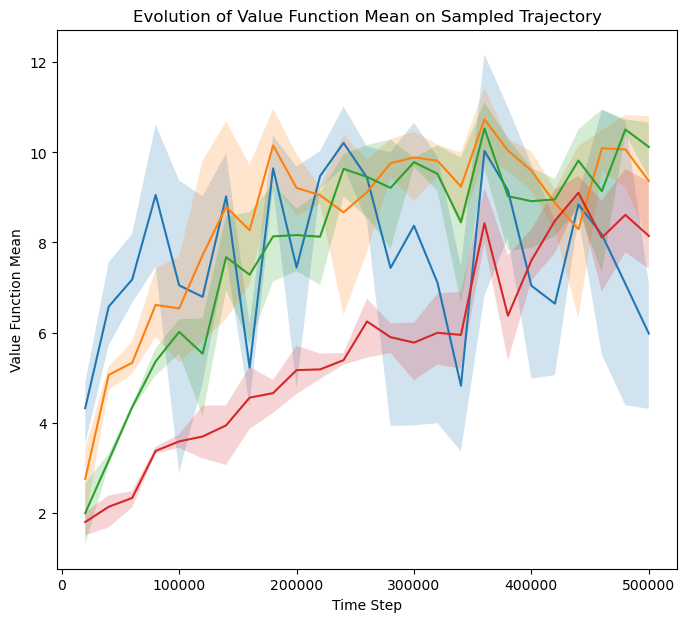

In [35]:
plt.figure(figsize=(8,7))

for k,v in disc_agents_dicts.items():
    if k != "Agent 1":
        mean = np.mean(np.array(v['value_trajectories_mean_all']), axis=0)
        min = np.min(np.array(v['value_trajectories_mean_all']), axis=0)
        max = np.max(np.array(v['value_trajectories_mean_all']), axis=0)
        range_step = 20000
        plt.xlabel('Time Step')
        plt.ylabel('Value Function Mean')
        plt.title('Evolution of Value Function Mean on Sampled Trajectory')
        plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k + ' Mean')
        plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.2, label='Min/Max')

plt.savefig('imgs/DiscRest/valueEvolution.png', dpi = 300,  bbox_inches='tight')


### All Discrete env Agents return

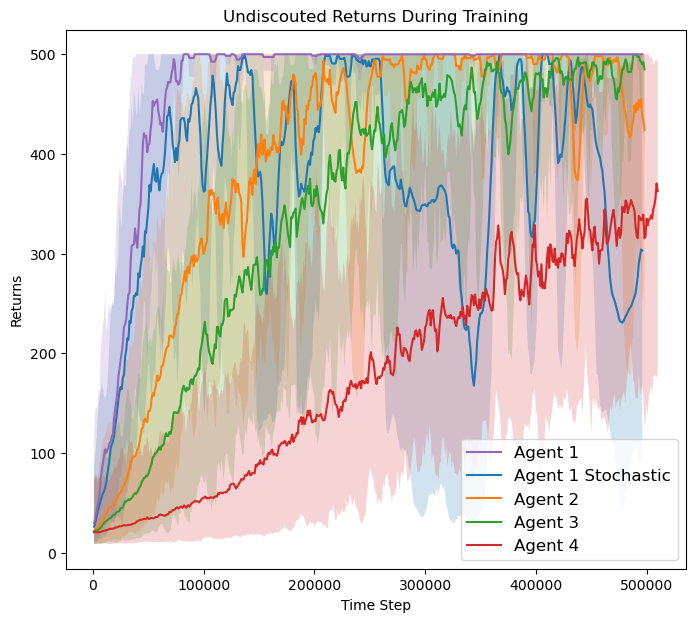

In [36]:
plt.figure(figsize=(8,7))
all_disc = list(disc_agents_dicts.items())
all_disc = all_disc[1:] + [all_disc[0]]

for k,v in all_disc:
    mean = np.convolve(v["mean_log_returns_all"], np.ones(5)/5, mode='valid')
    min = np.convolve(v["min_log_returns_all"], np.ones(5)/5, mode='valid')
    max = np.convolve(v["max_log_returns_all"], np.ones(5)/5, mode='valid')
    range_step = 1000
    
    plt.xlabel('Time Step')
    plt.ylabel('Returns')
    plt.title('Undiscouted Returns During Training')

    plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k)
        
    plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.2,)

handles, labels = plt.gca().get_legend_handles_labels()
order = [-1] + list(range(len(labels)-1))  # Move the last entry to the first
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], prop={'size': 12})
plt.savefig('imgs/AllDiscReturns/train.png', dpi = 300,  bbox_inches='tight')


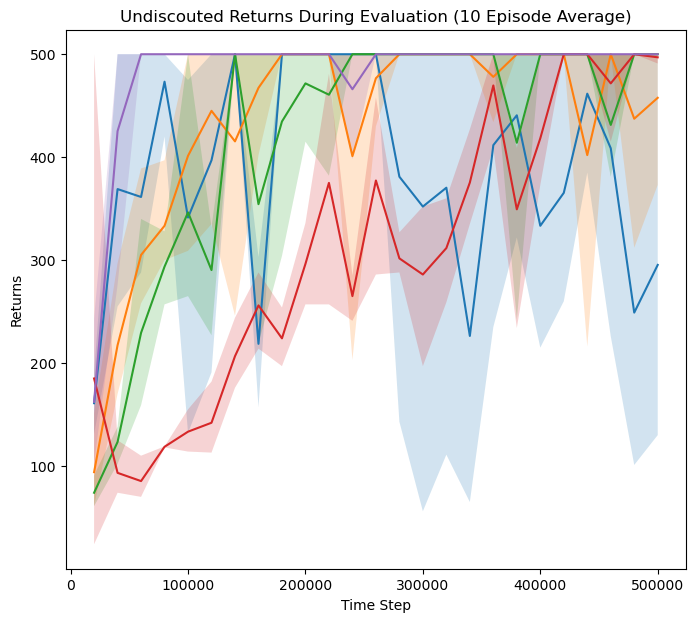

In [37]:
plt.figure(figsize=(8,7))
all_disc = list(disc_agents_dicts.items())
all_disc = all_disc[1:] + [all_disc[0]]

for k,v in all_disc:
    mean = np.mean(np.array(v['eval_return_history_all']), axis=0)
    min = np.min(np.array(v['eval_return_history_all']), axis=0)
    max = np.max(np.array(v['eval_return_history_all']), axis=0)

    range_step = 20000
    plt.xlabel('Time Step')
    plt.ylabel('Returns')
    plt.title('Undiscouted Returns During Evaluation (10 Episode Average)')
    plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k + ' Mean')
    plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.2, label='Min/Max')

plt.savefig('imgs/AllDiscReturns/Eval.png', dpi = 300,  bbox_inches='tight')


### Continous

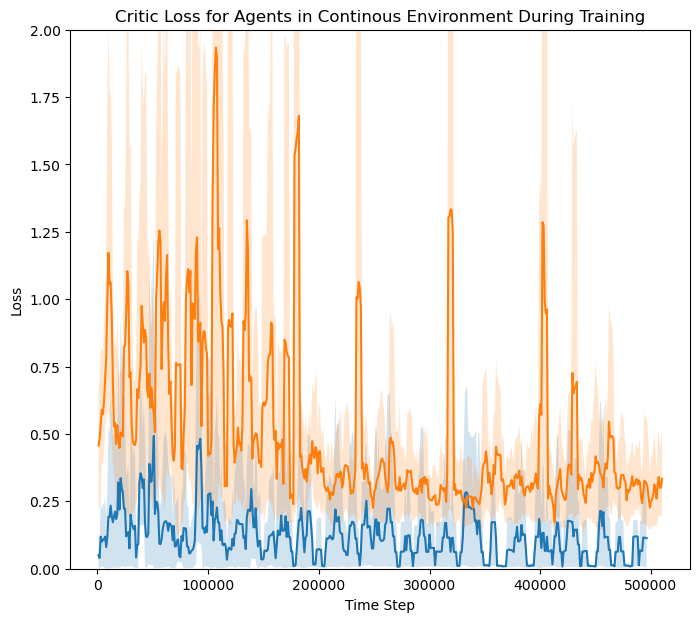

In [38]:
plt.figure(figsize=(8,7))

for k,v in cont_agents_dicts.items():
    agent_critic_loss = v["train_loss_critic_history_all"]
    mean = np.convolve(np.mean(agent_critic_loss, axis=0), np.ones(5)/5, mode='valid')
    min = np.convolve(np.min(agent_critic_loss, axis=0), np.ones(5)/5, mode='valid')
    max = np.convolve(np.max(agent_critic_loss, axis=0), np.ones(5)/5, mode='valid')

    range_step = 1000
    plt.xlabel('Time Step')
    plt.ylabel('Loss')
    plt.title('Critic Loss for Agents in Continous Environment During Training')
    plt.ylim(0,2)
    plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k +" critic loss mean")
    plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.2, label='Min/Max')

plt.savefig('imgs/Cont/Criticloss.png', dpi = 300,  bbox_inches='tight')


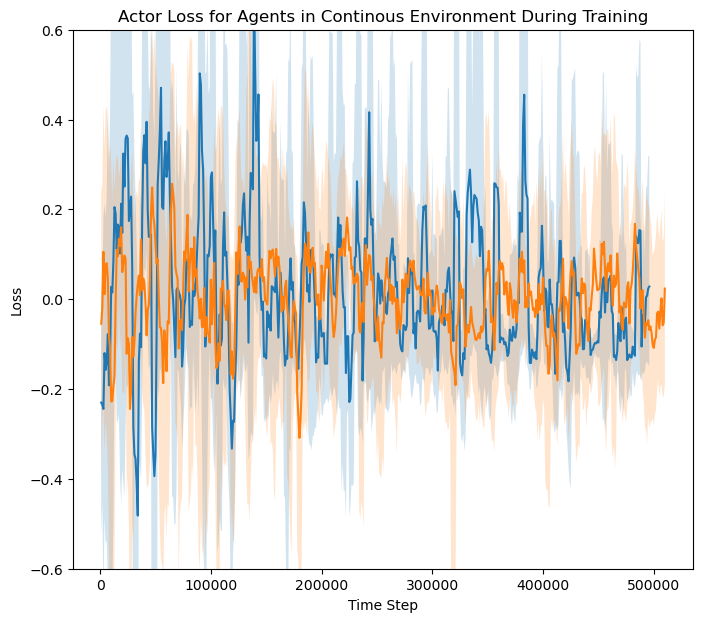

In [39]:
plt.figure(figsize=(8,7))

for k,v in cont_agents_dicts.items():
    agent_actor_loss = v["train_loss_actor_history_all"]

    mean = np.convolve(np.mean(agent_actor_loss, axis=0), np.ones(5)/5, mode='valid')
    min = np.convolve(np.min(agent_actor_loss, axis=0), np.ones(5)/5, mode='valid')
    max = np.convolve(np.max(agent_actor_loss, axis=0), np.ones(5)/5, mode='valid')
    range_step = 1000
    plt.xlabel('Time Step')
    plt.ylabel('Loss')
    plt.title('Actor Loss for Agents in Continous Environment During Training')
    plt.ylim(-0.6,0.6)
    plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k +" actor loss mean")
    plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.2, label='Min/Max')

plt.savefig('imgs/Cont/ActorLoss.png', dpi = 300,  bbox_inches='tight')


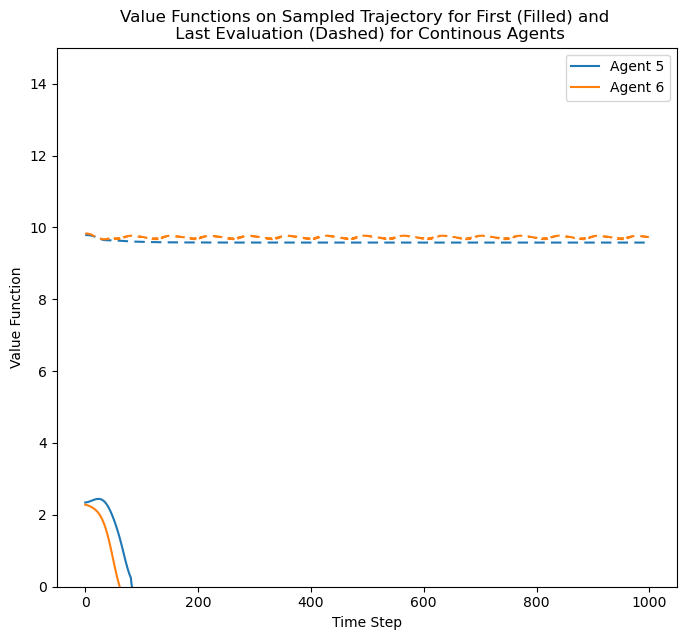

In [40]:
plt.figure(figsize=(8,7))

color_map = {}

for k,v in cont_agents_dicts.items():
    for i in [0, 3]:
        trajectory = v["value_funcs_20_100_500"][i]
        if i == 0:  # First line
            line, = plt.plot(trajectory, label = k)
            color_map[k] = line.get_color()  # Store the color of the line
        else:  # Second line
            plt.plot(trajectory, color=color_map[k],dashes=[5,3])  # Use the same color and set linestyle to dashed
        plt.legend(prop={'size': 10})
        plt.ylim(0, 15)
        plt.xlabel('Time Step')
        plt.ylabel('Value Function')
        plt.title('Value Functions on Sampled Trajectory for First (Filled) and \n Last Evaluation (Dashed) for Continous Agents')

plt.savefig('imgs/Cont/taject.png', dpi = 300,  bbox_inches='tight')

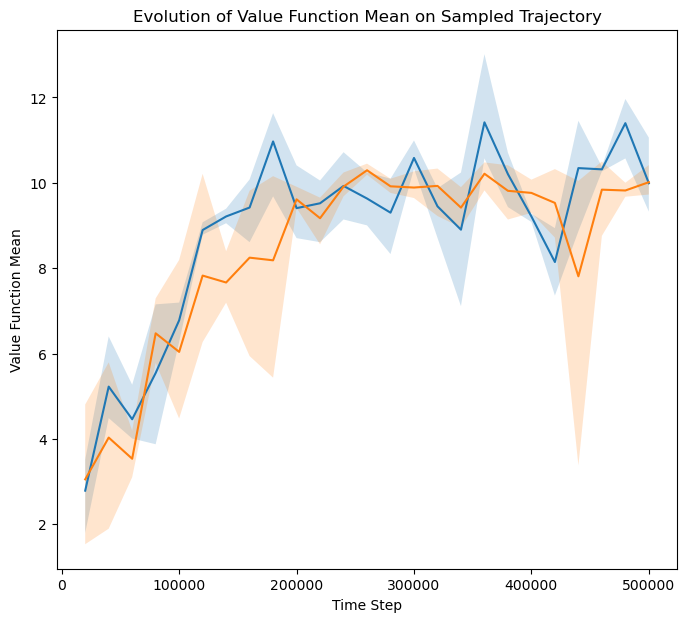

In [41]:
plt.figure(figsize=(8,7))

for k,v in cont_agents_dicts.items():
    mean = np.mean(np.array(v['value_trajectories_mean_all']), axis=0)
    min = np.min(np.array(v['value_trajectories_mean_all']), axis=0)
    max = np.max(np.array(v['value_trajectories_mean_all']), axis=0)

    range_step = 20000
    plt.xlabel('Time Step')
    plt.ylabel('Value Function Mean')
    plt.title('Evolution of Value Function Mean on Sampled Trajectory')
    plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k + ' Mean')
    plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.2, label='Min/Max')
    #plt.legend(prop={'size': 10})

plt.savefig('imgs/Cont/valeEvolution.png', dpi = 300,  bbox_inches='tight')

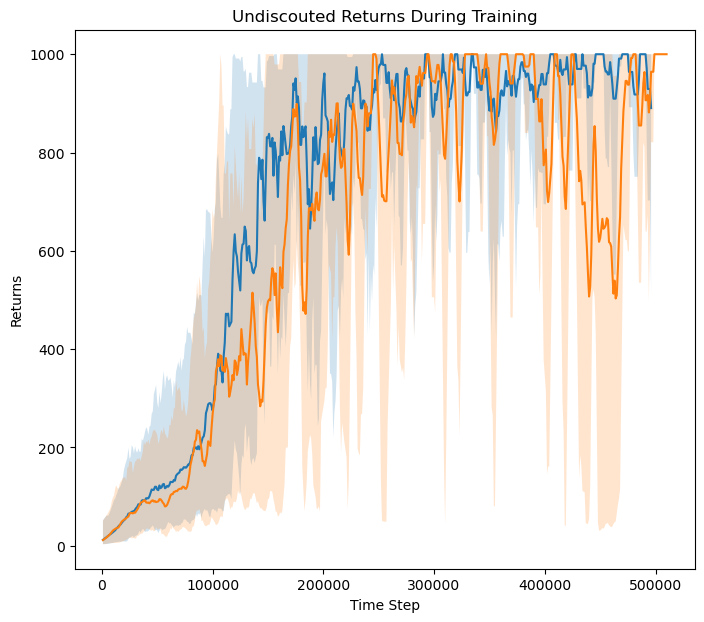

In [42]:
plt.figure(figsize=(8,7))
for k,v in cont_agents_dicts.items():
    mean = np.convolve(v["mean_log_returns_all"], np.ones(5)/5, mode='valid')
    min = np.convolve(v["min_log_returns_all"], np.ones(5)/5, mode='valid')
    max = np.convolve(v["max_log_returns_all"], np.ones(5)/5, mode='valid')
    range_step = 1000
    plt.xlabel('Time Step')
    plt.ylabel('Returns')
    plt.title('Undiscouted Returns During Training')
    plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k + ' Mean')
    plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.2, label='Min/Max')
    #plt.legend(prop={'size': 10})

plt.savefig('imgs/Cont/returnTrain.png', dpi = 300,  bbox_inches='tight')


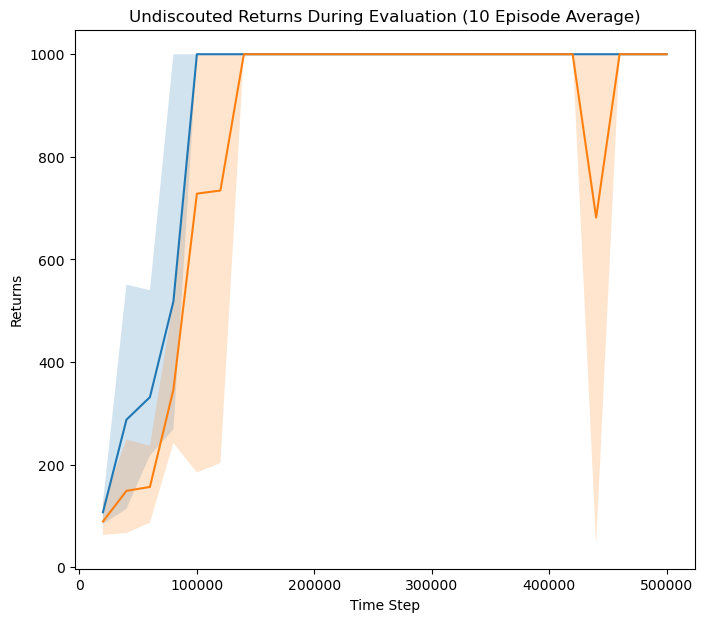

In [43]:
plt.figure(figsize=(8,7))

for k,v in cont_agents_dicts.items():
    mean = np.mean(np.array(v['eval_return_history_all']), axis=0)
    min = np.min(np.array(v['eval_return_history_all']), axis=0)
    max = np.max(np.array(v['eval_return_history_all']), axis=0)

    range_step = 20000
    plt.xlabel('Time Step')
    plt.ylabel('Returns')
    plt.title('Undiscouted Returns During Evaluation (10 Episode Average)')
    plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k + ' Mean')
    plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.2, label='Min/Max')

plt.savefig('imgs/Cont/returnEval.png', dpi = 300,  bbox_inches='tight')
